In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Simulate data

In [2]:
def inter_term(x, beta, i, j):
    return x[:, i, np.newaxis] * x[:, j, np.newaxis] @ beta

In [103]:
n = 1000
k = 30
n_outcome = 4
kcovar = 20
beta = np.reshape(np.array(range(1, k * n_outcome + 1)), newshape = [k, n_outcome])
bcovar = np.reshape(np.array(range(1, kcovar * n_outcome + 1)), newshape = [kcovar, n_outcome]) * 0.2
intercepts = np.array([230, 250, 270, 290])

x = np.random.normal(size = [n, k])
covar = np.random.normal(size = [n, kcovar])
y = np.matmul(x, beta) + np.matmul(covar, bcovar) + np.random.normal(size = [n, n_outcome]) + intercepts + inter_term(x, beta[np.newaxis, 10, :] * 10, 0, 1) + inter_term(x, beta[np.newaxis, 5, :] * 10, 2, 3) + inter_term(x, beta[np.newaxis, 7, :] * 10, 0, 2) + inter_term(x, beta[np.newaxis, 5, :] * 10, 1, 3) + inter_term(x, beta[np.newaxis, 9, :] * 10, 0, 3) + inter_term(x, beta[np.newaxis, 12, :] * 10, 1, 2)
dataset = tf.data.Dataset.from_tensor_slices((x, np.concatenate((y, covar), axis = 1)))
dataset = dataset.map(lambda x, y: (tf.cast(x, tf.float32), tf.cast(y, tf.float32)))
dataset = dataset.batch(7)
tempx = np.concatenate((x, covar), axis = 1)
tempx = tempx[:, :, np.newaxis]
tempy = y[:, 0, np.newaxis]

In [3]:
dataset.element_spec

(TensorSpec(shape=(None, 30), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 24), dtype=tf.float32, name=None))

# Build model

In [128]:
inputx = tf.keras.Input(shape = (50, 1))  # x.shape[1] + covar.shape[1]))
print(inputx)
x_ = tf.keras.layers.Conv1D(kernel_size = 4, filters = 32, activation = 'relu')(inputx)
print(x_)
x_ = tf.keras.layers.MaxPool1D(2)(x_)
print(x_)
x_ = tf.keras.layers.Dropout(0.2)(x_)
print(x_)
x_ = tf.keras.layers.Conv1D(kernel_size = 4, filters = 64, activation = 'relu')(x_)
print(x_)
x_ = tf.keras.layers.MaxPool1D(4)(x_)
print(x_)
x_ = tf.keras.layers.Dropout(0.2)(x_)
print(x_)
x_ = tf.keras.layers.Flatten(data_format=None)(x_)
print(x_)
outputy = tf.keras.layers.Dense(1, activation='linear')(x_)
print(x_)
model = tf.keras.Model(inputs=inputx, outputs = outputy)

Tensor("input_7:0", shape=(None, 50, 1), dtype=float32)
Tensor("conv1d_12/Identity:0", shape=(None, 47, 32), dtype=float32)
Tensor("max_pooling1d_12/Identity:0", shape=(None, 23, 32), dtype=float32)
Tensor("dropout_12/Identity:0", shape=(None, 23, 32), dtype=float32)
Tensor("conv1d_13/Identity:0", shape=(None, 20, 64), dtype=float32)
Tensor("max_pooling1d_13/Identity:0", shape=(None, 5, 64), dtype=float32)
Tensor("dropout_13/Identity:0", shape=(None, 5, 64), dtype=float32)
Tensor("flatten_6/Identity:0", shape=(None, 320), dtype=float32)
Tensor("flatten_6/Identity:0", shape=(None, 320), dtype=float32)


In [129]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 47, 32)            160       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 23, 32)            0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 23, 32)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 20, 64)            8256      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 64)             0   

# First train

In [105]:
# def map_func()
dataset_new = dataset.map(lambda x, y: (tf.expand_dims(tf.concat((x, y[:, n_outcome:]), axis = 1), axis = 2), tf.expand_dims(y[:, 0], axis = 1)))  # (tf.concat((ele[0], ele[1][:, 1:]), axis = 1), ele[1][:, 0]))
dataset_new_train = dataset_new.take(100)
dataset_new_test = dataset_new.skip(100).take(100)
dataset_train = dataset.take(100)
dataset_test = dataset.skip(100).take(100)

# dataset.apply(tf.data.experimental.map_and_batch(map_func=parse_func, batch_size,num_parallel_batches))

In [132]:
for ele in dataset_new_train:
    print(ele[0].shape, ele[1].shape)

(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1) (7, 1)
(7, 50, 1)

In [133]:
model.compile(optimizer = 'adam',
                    loss = tf.keras.losses.mean_squared_error,
                    metrics = [tf.keras.metrics.MeanSquaredError()])

In [134]:
model.fit(dataset_new_train.repeat(100), epochs = 100, steps_per_epoch = 700 // 7)
# model.fit(tempx, tempy,  # img_data,  , class_targets
#           batch_size=7,
#           epochs=1000)

Train for 100 steps
Epoch 1/100
100/100 [==============================] - 1s 8ms/step - loss: 182029.9498 - mean_squared_error: 182029.9375
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 124932.0428 - mean_squared_error: 124932.0469
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 108954.5430 - mean_squared_error: 108954.5625
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 96001.4373 - mean_squared_error: 96001.4297
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 78722.1534 - mean_squared_error: 78722.1484
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 54853.6032 - mean_squared_error: 54853.6055
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 36547.3837 - mean_squared_error: 36547.3828
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 29297.3112 - mean_squared_error: 29297.3203
Epoch 9/100
100/100 [=

In [153]:
def get_y(dataset):
    ytest = []
    for ele in dataset:
        ytest.append(ele[1].numpy())
    return np.concatenate(ytest, axis = 0)
def mse(y, yp):
    return np.mean(np.power(y - yp, 2))
def mse_tf(y, yp):
    return tf.reduce_mean(tf.math.power(y - yp, 2))

In [136]:
ytest = get_y(dataset_new_test)[:, 0]
ytest_pred = model.predict(dataset_new_test)[:, 0]

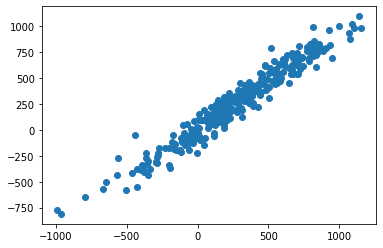

In [137]:
import matplotlib.pyplot as plt
plt.scatter(ytest, ytest_pred)

In [138]:
mse(ytest, ytest_pred)

8256.952

# Run least squares

In [97]:
import sys
sys.path.append('../code')
from importlib import reload  
import lib_LinearAlgebra
lib_LinearAlgebra = reload(lib_LinearAlgebra)

In [106]:
data_scheme = lib_LinearAlgebra.DataScheme(
    dataset = dataset_train, 
    X_index = 0, 
    Y_index = 1, 
    outcome_indice = [ 0, 1, 2, 3 ], 
    covariate_indice = np.array([ i for i in range(n_outcome, kcovar + n_outcome) ])
)

solver = lib_LinearAlgebra.LeastSquaredEstimator(data_scheme, normalizer = False, intercept = True)

In [107]:
solver.solve()

In [108]:
o = solver.predict(dataset_test) 
ytest_ls = o['y']# [:, 0]
ytest_pred_ls = o['y_pred']# [:, 0]

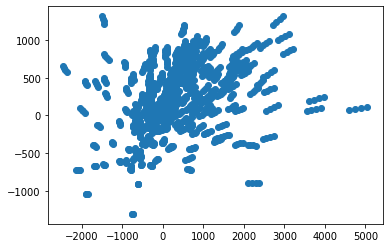

In [109]:
plt.scatter(ytest_ls, ytest_pred_ls)

In [110]:
mse(ytest_ls, ytest_pred_ls)

934360.44

In [29]:
ytest_ls.shape

(300, 4)

(array([ 7., 15., 30., 60., 67., 57., 45., 14.,  4.,  1.]),
 array([-2.7563477 , -2.1545532 , -1.5527588 , -0.95096433, -0.3491699 ,
         0.2526245 ,  0.85441893,  1.4562134 ,  2.0580077 ,  2.6598022 ,
         3.2615967 ], dtype=float32),
 <a list of 10 Patch objects>)

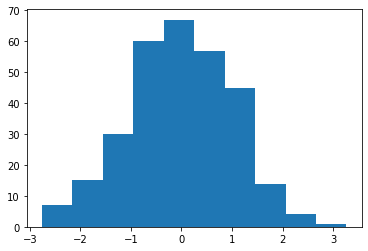

In [184]:
plt.hist(ytest - ytest_pred_ls)

(array([ 1.,  2.,  1., 13., 36., 86., 83., 53., 18.,  7.]),
 array([-395.0505   , -329.82294  , -264.5954   , -199.36784  ,
        -134.14029  ,  -68.912735 ,   -3.6851807,   61.542374 ,
         126.76993  ,  191.99748  ,  257.22504  ], dtype=float32),
 <a list of 10 Patch objects>)

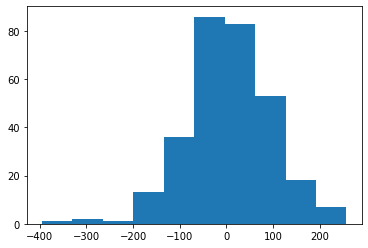

In [185]:
plt.hist(ytest - ytest_pred)

# More freedom tries

In [209]:
import sys
sys.path.append('../code')
import lib_cnnPTRS, util_misc
from importlib import reload
lib_cnnPTRS = reload(lib_cnnPTRS)
util_misc = reload(util_misc)

In [210]:
cnn_model = util_misc.load_ordered_yaml('../misc_files/cnn_test.yaml')

In [211]:
cnn = lib_cnnPTRS.cnnPTRS(cnn_model, k, n_outcome, kcovar)

In [212]:
cnn.model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 27, 32)       160         input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_6 (MaxPooling1D)  (None, 13, 32)       0           conv1d_6[0][0]                   
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 13, 32)       0           max_pooling1d_6[0][0]            
____________________________________________________________________________________________

In [213]:
def get_inputs_and_y(dataset, n_outcome, block = 100000000):
    for inputs, y in dataset.unbatch().batch(block):
        inputs = [tf.expand_dims(inputs, axis = 2), y[:, n_outcome:]]
        y = y[:, :n_outcome]
        break
#     inputs = [ tf.cast(i, tf.float32) for i in inputs ]
#     y = tf.cast(y, tf.float32)
    return inputs, y

In [214]:
xtest, ytest = get_inputs_and_y(dataset_test, n_outcome)
xtrain, ytrain = get_inputs_and_y(dataset_train, n_outcome)

In [225]:
# a gradient tape example
# learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam()
compute_loss = tf.keras.losses.MeanSquaredError()
compute_accuracy = tf.keras.metrics.MeanSquaredError()

def mse_tf(y, yp):
    return tf.reduce_mean(tf.math.pow(y - yp, 2))
def sample_size(dataset):
    n = 0
    for i in dataset:
        n += i[0].shape[0]
    return n
    
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        y_ = model(x)
        loss = compute_loss(y, y_)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    compute_accuracy(y, y_)
    return loss

@tf.function
def predict(model, inputs):    
    return model(inputs)

@tf.function
def train(model, optimizer, dataset, n_outcome, inputs_valid, y_valid):
#     train_ds = mnist_dataset()
    step = 0
    loss = 0.0
    accuracy = 0.0
    for x, y in dataset.repeat(200):
        inputs = [tf.expand_dims(x, axis = 2), y[:, n_outcome:]]
        y = y[:, :n_outcome]
        step += 1
        loss = train_one_step(model, optimizer, inputs, y)
        if step % 10 == 0:
            yp = predict(model, inputs_valid)
            tf.print('Step', step, ': loss', loss, '; accuracy', compute_accuracy.result(), '; valid_accu', mse_tf(yp, y_valid))
    return step, loss, accuracy

# @tf.function
# def predict(model, dataset, n):
#     yp = tf.zeros((n))
#     yo = tf.zeros((n))
#     counter = 0
#     for x, y in dataset:
#         inputs = [tf.expand_dims(x, axis = 2), y[:, n_outcome:]]
#         y = y[:, :n_outcome]
#         y_ = model(inputs)
#         yp[counter : (counter + y.shape[0])] = y_
#         yo[counter : (counter + y.shape[0])] = y
#         counter += y.shape[0] - 1
# #         yp.append(y_)
# #         yo.append(y)
#     return yp, yo  # tf.concat(yp, axis = 0), tf.concat(yo, axis = 0)

step, loss, accuracy = train(cnn.model, optimizer, dataset_train, n_outcome, xtest, ytest)

Step 10 : loss 1275144.12 ; accuracy 757741 ; valid_accu 977722.438
Step 20 : loss 794435.375 ; accuracy 824140.75 ; valid_accu 981922
Step 30 : loss 563311.125 ; accuracy 910920.625 ; valid_accu 984129.062
Step 40 : loss 778191.188 ; accuracy 1047378.31 ; valid_accu 983058.125
Step 50 : loss 431173.438 ; accuracy 1020892.81 ; valid_accu 982649.812
Step 60 : loss 396069.562 ; accuracy 990712.625 ; valid_accu 978807.375
Step 70 : loss 442068.75 ; accuracy 941015.375 ; valid_accu 979491.812
Step 80 : loss 1280245.75 ; accuracy 919321.188 ; valid_accu 981842.375
Step 90 : loss 269867.094 ; accuracy 892506.812 ; valid_accu 982798
Step 100 : loss 559517.688 ; accuracy 880398 ; valid_accu 978866
Step 110 : loss 1271035.38 ; accuracy 869125.125 ; valid_accu 976966.75
Step 120 : loss 797525.688 ; accuracy 870699.438 ; valid_accu 979687.875
Step 130 : loss 570756.125 ; accuracy 886941.062 ; valid_accu 981589.438
Step 140 : loss 776573.875 ; accuracy 927364.188 ; valid_accu 980522.75
Step 150 : 

Step 1160 : loss 365934.781 ; accuracy 878039.938 ; valid_accu 971277.875
Step 1170 : loss 421936.531 ; accuracy 876011.875 ; valid_accu 972647.875
Step 1180 : loss 1255796.25 ; accuracy 875070.688 ; valid_accu 976042.25
Step 1190 : loss 311236.312 ; accuracy 873409.5 ; valid_accu 977678.938
Step 1200 : loss 604713.125 ; accuracy 872484.062 ; valid_accu 972826.438
Step 1210 : loss 1264332.88 ; accuracy 871558.938 ; valid_accu 970639.812
Step 1220 : loss 811034.438 ; accuracy 871455.25 ; valid_accu 974098.125
Step 1230 : loss 574923.75 ; accuracy 872970.375 ; valid_accu 976742.188
Step 1240 : loss 731205.5 ; accuracy 877453.062 ; valid_accu 975715.938
Step 1250 : loss 440441.844 ; accuracy 877595.312 ; valid_accu 975518.75
Step 1260 : loss 363692.094 ; accuracy 876959.75 ; valid_accu 970953.25
Step 1270 : loss 420407.344 ; accuracy 875096.438 ; valid_accu 972367.25
Step 1280 : loss 1253397.75 ; accuracy 874233.875 ; valid_accu 975876.062
Step 1290 : loss 314657.719 ; accuracy 872709.25 

Step 2290 : loss 341507.75 ; accuracy 866549.812 ; valid_accu 975910.375
Step 2300 : loss 641612.375 ; accuracy 866078.312 ; valid_accu 970170.688
Step 2310 : loss 1265636.75 ; accuracy 865625.625 ; valid_accu 967643.812
Step 2320 : loss 807167 ; accuracy 865511.625 ; valid_accu 971442.125
Step 2330 : loss 575129.5 ; accuracy 866270.812 ; valid_accu 974486.375
Step 2340 : loss 699099.875 ; accuracy 868591.438 ; valid_accu 973508.375
Step 2350 : loss 441767.719 ; accuracy 868627.062 ; valid_accu 973222.312
Step 2360 : loss 342882.062 ; accuracy 868204.875 ; valid_accu 968138.125
Step 2370 : loss 409204.438 ; accuracy 867217.438 ; valid_accu 969840.75
Step 2380 : loss 1223226.62 ; accuracy 866775.312 ; valid_accu 973927.562
Step 2390 : loss 343954.5 ; accuracy 865984.625 ; valid_accu 975854.312
Step 2400 : loss 644588 ; accuracy 865534.25 ; valid_accu 970012.938
Step 2410 : loss 1265792.62 ; accuracy 865101.562 ; valid_accu 967432.75
Step 2420 : loss 805953 ; accuracy 864988.312 ; valid_

Step 3430 : loss 568523.438 ; accuracy 860253 ; valid_accu 972255.562
Step 3440 : loss 676928.312 ; accuracy 861800.875 ; valid_accu 971357.625
Step 3450 : loss 435959.031 ; accuracy 861792.562 ; valid_accu 971038.812
Step 3460 : loss 329524.188 ; accuracy 861446.188 ; valid_accu 965719.125
Step 3470 : loss 400666 ; accuracy 860762.75 ; valid_accu 967713.188
Step 3480 : loss 1200588.25 ; accuracy 860469.812 ; valid_accu 972282.438
Step 3490 : loss 364697.156 ; accuracy 859943.688 ; valid_accu 974360.438
Step 3500 : loss 667924.688 ; accuracy 859638.812 ; valid_accu 967744.188
Step 3510 : loss 1268876 ; accuracy 859341.375 ; valid_accu 964849.188
Step 3520 : loss 784533 ; accuracy 859237.25 ; valid_accu 968743.812
Step 3530 : loss 567801.062 ; accuracy 859708.562 ; valid_accu 972059.312
Step 3540 : loss 675061.5 ; accuracy 861209.688 ; valid_accu 971140.688
Step 3550 : loss 435054.188 ; accuracy 861198.75 ; valid_accu 970811.75
Step 3560 : loss 328431 ; accuracy 860856.75 ; valid_accu 9

Step 4560 : loss 319603.75 ; accuracy 854961.875 ; valid_accu 962605
Step 4570 : loss 391883.156 ; accuracy 854428.188 ; valid_accu 964812.25
Step 4580 : loss 1190316.62 ; accuracy 854213.062 ; valid_accu 969677.25
Step 4590 : loss 379418.781 ; accuracy 853822.188 ; valid_accu 971880.125
Step 4600 : loss 684429.062 ; accuracy 853587.188 ; valid_accu 964633.25
Step 4610 : loss 1262678.38 ; accuracy 853347.5 ; valid_accu 961475.312
Step 4620 : loss 751674.312 ; accuracy 853250.75 ; valid_accu 965365.312
Step 4630 : loss 561244.812 ; accuracy 853582.438 ; valid_accu 968853.312
Step 4640 : loss 654404.562 ; accuracy 854705 ; valid_accu 968056.562
Step 4650 : loss 426504.438 ; accuracy 854674.5 ; valid_accu 967792.125
Step 4660 : loss 319045.844 ; accuracy 854367.312 ; valid_accu 962293.562
Step 4670 : loss 391147.656 ; accuracy 853843.688 ; valid_accu 964510.938
Step 4680 : loss 1.18997e+06 ; accuracy 853634.062 ; valid_accu 969413.125
Step 4690 : loss 380598.312 ; accuracy 853252.375 ; va

Step 5690 : loss 392529.438 ; accuracy 847373.312 ; valid_accu 969142
Step 5700 : loss 699852.688 ; accuracy 847176.375 ; valid_accu 961175.438
Step 5710 : loss 1251508.38 ; accuracy 846967.312 ; valid_accu 957720
Step 5720 : loss 711946.312 ; accuracy 846874.5 ; valid_accu 961512.875
Step 5730 : loss 549137.312 ; accuracy 847110.375 ; valid_accu 965114.875
Step 5740 : loss 633412.312 ; accuracy 847998.875 ; valid_accu 964432
Step 5750 : loss 417662.281 ; accuracy 847953.688 ; valid_accu 964253.625
Step 5760 : loss 314387.75 ; accuracy 847668.312 ; valid_accu 958707.188
Step 5770 : loss 381962.5 ; accuracy 847229.125 ; valid_accu 961253
Step 5780 : loss 1190823 ; accuracy 847065.188 ; valid_accu 966542.312
Step 5790 : loss 393685.781 ; accuracy 846766.312 ; valid_accu 968939.812
Step 5800 : loss 701198.812 ; accuracy 846572.062 ; valid_accu 960870.312
Step 5810 : loss 1250311.12 ; accuracy 846365.25 ; valid_accu 957374.062
Step 5820 : loss 708164.562 ; accuracy 846272.688 ; valid_accu 

Step 6820 : loss 674629.875 ; accuracy 840046.875 ; valid_accu 958022.812
Step 6830 : loss 530735.312 ; accuracy 840210.562 ; valid_accu 961798
Step 6840 : loss 611249.125 ; accuracy 840939.5 ; valid_accu 961302.625
Step 6850 : loss 405928.688 ; accuracy 840879.062 ; valid_accu 961127.875
Step 6860 : loss 310618.844 ; accuracy 840612.375 ; valid_accu 955389.562
Step 6870 : loss 377238.844 ; accuracy 840233.062 ; valid_accu 958168.938
Step 6880 : loss 1191208.25 ; accuracy 840096.812 ; valid_accu 963816.875
Step 6890 : loss 404250.281 ; accuracy 839852.5 ; valid_accu 966374.625
Step 6900 : loss 713290.625 ; accuracy 839679.938 ; valid_accu 957606.062
Step 6910 : loss 1236461.88 ; accuracy 839493.125 ; valid_accu 953912.625
Step 6920 : loss 671291.375 ; accuracy 839403.5 ; valid_accu 957621.312
Step 6930 : loss 529260.688 ; accuracy 839561.812 ; valid_accu 961427.188
Step 6940 : loss 609470 ; accuracy 840278.625 ; valid_accu 960918
Step 6950 : loss 404529.219 ; accuracy 840216.5 ; valid_

Step 7950 : loss 394525.938 ; accuracy 833413.688 ; valid_accu 957134.812
Step 7960 : loss 307767.094 ; accuracy 833164.688 ; valid_accu 951348.938
Step 7970 : loss 374050.062 ; accuracy 832831.875 ; valid_accu 954542.812
Step 7980 : loss 1185303.12 ; accuracy 832710.812 ; valid_accu 960665.375
Step 7990 : loss 414221.281 ; accuracy 832503.438 ; valid_accu 963488.875
Step 8000 : loss 724556 ; accuracy 832347.312 ; valid_accu 953852.062
Step 8010 : loss 1215597 ; accuracy 832175.875 ; valid_accu 949876.812
Step 8020 : loss 642850.688 ; accuracy 832087.5 ; valid_accu 953495.812
Step 8030 : loss 500247.719 ; accuracy 832193.688 ; valid_accu 957512
Step 8040 : loss 586516.312 ; accuracy 832793.875 ; valid_accu 957016.188
Step 8050 : loss 393572.031 ; accuracy 832715.438 ; valid_accu 956698.688
Step 8060 : loss 307754.469 ; accuracy 832468.062 ; valid_accu 950890.125
Step 8070 : loss 373745.5 ; accuracy 832138.688 ; valid_accu 954105.188
Step 8080 : loss 1183612.62 ; accuracy 832018.438 ; v

Step 9080 : loss 1160480.88 ; accuracy 824828.188 ; valid_accu 954728.562
Step 9090 : loss 423403.562 ; accuracy 824644.625 ; valid_accu 957798.188
Step 9100 : loss 726660.688 ; accuracy 824500.625 ; valid_accu 947235.5
Step 9110 : loss 1192051.88 ; accuracy 824341.875 ; valid_accu 943046.312
Step 9120 : loss 622359.688 ; accuracy 824253.312 ; valid_accu 946546.75
Step 9130 : loss 461330.344 ; accuracy 824316.188 ; valid_accu 950928.938
Step 9140 : loss 567720.688 ; accuracy 824820.938 ; valid_accu 950468.062
Step 9150 : loss 383300.219 ; accuracy 824725.562 ; valid_accu 949950.938
Step 9160 : loss 308368.938 ; accuracy 824493.188 ; valid_accu 943811.312
Step 9170 : loss 373254.812 ; accuracy 824198.125 ; valid_accu 947300.5
Step 9180 : loss 1157815.75 ; accuracy 824079.875 ; valid_accu 953987
Step 9190 : loss 424255.156 ; accuracy 823897.75 ; valid_accu 957072.75
Step 9200 : loss 726246.562 ; accuracy 823754.438 ; valid_accu 946446.5
Step 9210 : loss 1190036.12 ; accuracy 823596.688 ;

Step 10210 : loss 1162568.38 ; accuracy 815778 ; valid_accu 933059.062
Step 10220 : loss 603447.5 ; accuracy 815686.812 ; valid_accu 936590.625
Step 10230 : loss 418505.312 ; accuracy 815711.5 ; valid_accu 941368.875
Step 10240 : loss 552194.625 ; accuracy 816134.375 ; valid_accu 940837
Step 10250 : loss 374481.938 ; accuracy 816023.938 ; valid_accu 940082.75
Step 10260 : loss 308693.562 ; accuracy 815804.625 ; valid_accu 933619.188
Step 10270 : loss 370579.719 ; accuracy 815535 ; valid_accu 937500.188
Step 10280 : loss 1117090.5 ; accuracy 815410.375 ; valid_accu 944845.438
Step 10290 : loss 428848.844 ; accuracy 815240.688 ; valid_accu 947962.562
Step 10300 : loss 713204.688 ; accuracy 815104.312 ; valid_accu 936291.312
Step 10310 : loss 1159206.62 ; accuracy 814953.062 ; valid_accu 932048
Step 10320 : loss 601380.062 ; accuracy 814861.5 ; valid_accu 935605.625
Step 10330 : loss 414636.656 ; accuracy 814882.812 ; valid_accu 940375.875
Step 10340 : loss 550535 ; accuracy 815298.562 ; 

Step 11330 : loss 375215.344 ; accuracy 806132.188 ; valid_accu 929501.625
Step 11340 : loss 532353.125 ; accuracy 806481.812 ; valid_accu 928889.375
Step 11350 : loss 370652.656 ; accuracy 806359 ; valid_accu 927953.25
Step 11360 : loss 305233.438 ; accuracy 806150 ; valid_accu 921357.438
Step 11370 : loss 368992.312 ; accuracy 805900.688 ; valid_accu 925602.25
Step 11380 : loss 1057716.5 ; accuracy 805764.188 ; valid_accu 933446.375
Step 11390 : loss 425756.812 ; accuracy 805601.188 ; valid_accu 936161.5
Step 11400 : loss 694394.938 ; accuracy 805468.875 ; valid_accu 923648.438
Step 11410 : loss 1115342.62 ; accuracy 805319.812 ; valid_accu 919668.375
Step 11420 : loss 577116.188 ; accuracy 805223.125 ; valid_accu 923281.188
Step 11430 : loss 371552.062 ; accuracy 805210.188 ; valid_accu 928411.75
Step 11440 : loss 530820.562 ; accuracy 805553.625 ; valid_accu 927544.938
Step 11450 : loss 368906.219 ; accuracy 805429.75 ; valid_accu 926510.312
Step 11460 : loss 304455.094 ; accuracy 

Step 12450 : loss 369410.656 ; accuracy 795672.812 ; valid_accu 914593.25
Step 12460 : loss 297590.656 ; accuracy 795472.062 ; valid_accu 908316.5
Step 12470 : loss 367599.656 ; accuracy 795237 ; valid_accu 912711.438
Step 12480 : loss 996236.875 ; accuracy 795087.812 ; valid_accu 921005
Step 12490 : loss 414253.312 ; accuracy 794928.438 ; valid_accu 923226.375
Step 12500 : loss 673335.312 ; accuracy 794798.312 ; valid_accu 910306.125
Step 12510 : loss 1071514.25 ; accuracy 794650.188 ; valid_accu 906724.812
Step 12520 : loss 548692.312 ; accuracy 794548.75 ; valid_accu 910128
Step 12530 : loss 328868.031 ; accuracy 794504.188 ; valid_accu 915210.875
Step 12540 : loss 507244.656 ; accuracy 794785 ; valid_accu 914413.875
Step 12550 : loss 369461.656 ; accuracy 794652.812 ; valid_accu 913450.25
Step 12560 : loss 297279.656 ; accuracy 794452.75 ; valid_accu 907226.125
Step 12570 : loss 367433.281 ; accuracy 794218.625 ; valid_accu 911666.125
Step 12580 : loss 990666.938 ; accuracy 794068.

Step 13560 : loss 287190.938 ; accuracy 783849.375 ; valid_accu 895751.688
Step 13570 : loss 369240.156 ; accuracy 783624.062 ; valid_accu 900152.188
Step 13580 : loss 941148.438 ; accuracy 783465.062 ; valid_accu 908670.75
Step 13590 : loss 395527.031 ; accuracy 783308.625 ; valid_accu 910194.438
Step 13600 : loss 647464.562 ; accuracy 783180.688 ; valid_accu 897146.25
Step 13610 : loss 1016899.31 ; accuracy 783032.25 ; valid_accu 894141.125
Step 13620 : loss 512337.062 ; accuracy 782927.875 ; valid_accu 897088.875
Step 13630 : loss 294088.281 ; accuracy 782854.938 ; valid_accu 901903.25
Step 13640 : loss 481401.5 ; accuracy 783080.812 ; valid_accu 900950.188
Step 13650 : loss 371206.219 ; accuracy 782945.5 ; valid_accu 900091.062
Step 13660 : loss 286380.656 ; accuracy 782751.062 ; valid_accu 894549.125
Step 13670 : loss 369976.281 ; accuracy 782527.062 ; valid_accu 898928.875
Step 13680 : loss 936254.688 ; accuracy 782367.375 ; valid_accu 907490.375
Step 13690 : loss 394224.188 ; ac

Step 14670 : loss 375900.062 ; accuracy 771230.25 ; valid_accu 887152.25
Step 14680 : loss 888566 ; accuracy 771065.25 ; valid_accu 896179.312
Step 14690 : loss 377205.781 ; accuracy 770911.125 ; valid_accu 896881.25
Step 14700 : loss 615203 ; accuracy 770785.5 ; valid_accu 883680.125
Step 14710 : loss 958985.5 ; accuracy 770637.188 ; valid_accu 881226.562
Step 14720 : loss 474176.281 ; accuracy 770531.438 ; valid_accu 883731.938
Step 14730 : loss 263543.812 ; accuracy 770435 ; valid_accu 888089.75
Step 14740 : loss 452716.25 ; accuracy 770610.938 ; valid_accu 886821.875
Step 14750 : loss 372188.281 ; accuracy 770477 ; valid_accu 886174.062
Step 14760 : loss 271997.469 ; accuracy 770287.312 ; valid_accu 881638.938
Step 14770 : loss 376165 ; accuracy 770072.188 ; valid_accu 885983.375
Step 14780 : loss 884408 ; accuracy 769906.812 ; valid_accu 895084.375
Step 14790 : loss 375896.219 ; accuracy 769753.125 ; valid_accu 895711.25
Step 14800 : loss 613006.438 ; accuracy 769627.75 ; valid_ac

Step 15790 : loss 364718.812 ; accuracy 757978.688 ; valid_accu 883015.688
Step 15800 : loss 585669.812 ; accuracy 757855.312 ; valid_accu 869900.188
Step 15810 : loss 889689.125 ; accuracy 757707.375 ; valid_accu 867990.75
Step 15820 : loss 432243.312 ; accuracy 757602.062 ; valid_accu 869859.625
Step 15830 : loss 238296 ; accuracy 757488.188 ; valid_accu 873738.5
Step 15840 : loss 426578.031 ; accuracy 757624.5 ; valid_accu 872399.25
Step 15850 : loss 367245.281 ; accuracy 757494.438 ; valid_accu 872090.75
Step 15860 : loss 259104.516 ; accuracy 757310.188 ; valid_accu 868542.312
Step 15870 : loss 385075.562 ; accuracy 757101.562 ; valid_accu 872602.75
Step 15880 : loss 830301 ; accuracy 756934.75 ; valid_accu 882050.625
Step 15890 : loss 364114 ; accuracy 756785.75 ; valid_accu 881805.438
Step 15900 : loss 583326.562 ; accuracy 756662.562 ; valid_accu 868670.75
Step 15910 : loss 883919.438 ; accuracy 756514.75 ; valid_accu 866812.812
Step 15920 : loss 428925.156 ; accuracy 756409.56

Step 16910 : loss 830282 ; accuracy 744490 ; valid_accu 854566.75
Step 16920 : loss 396084.031 ; accuracy 744385.375 ; valid_accu 855763.562
Step 16930 : loss 213827.672 ; accuracy 744258.938 ; valid_accu 859273.5
Step 16940 : loss 400881.5 ; accuracy 744364.312 ; valid_accu 858007.438
Step 16950 : loss 355330.062 ; accuracy 744238.188 ; valid_accu 858050
Step 16960 : loss 246583.25 ; accuracy 744060.125 ; valid_accu 855179.375
Step 16970 : loss 393015.156 ; accuracy 743856.625 ; valid_accu 859013.938
Step 16980 : loss 777897.938 ; accuracy 743691.688 ; valid_accu 868742.938
Step 16990 : loss 359569.656 ; accuracy 743548.5 ; valid_accu 867443.75
Step 17000 : loss 549171.875 ; accuracy 743426.062 ; valid_accu 854472.812
Step 17010 : loss 824440.812 ; accuracy 743279.625 ; valid_accu 853334.5
Step 17020 : loss 392598.156 ; accuracy 743175 ; valid_accu 854478.562
Step 17030 : loss 211474.422 ; accuracy 743047.75 ; valid_accu 858043.938
Step 17040 : loss 397668.938 ; accuracy 743150.875 ; 

Step 18030 : loss 197055.625 ; accuracy 730883.438 ; valid_accu 844814.062
Step 18040 : loss 373463.469 ; accuracy 730964 ; valid_accu 843806.812
Step 18050 : loss 345142.781 ; accuracy 730840.75 ; valid_accu 844132.938
Step 18060 : loss 236221.109 ; accuracy 730668.375 ; valid_accu 841648
Step 18070 : loss 401055.719 ; accuracy 730469.5 ; valid_accu 845568.875
Step 18080 : loss 725040.562 ; accuracy 730307.375 ; valid_accu 855082.375
Step 18090 : loss 349610.812 ; accuracy 730168.062 ; valid_accu 852678.375
Step 18100 : loss 512167.781 ; accuracy 730045.688 ; valid_accu 840233.625
Step 18110 : loss 776366.812 ; accuracy 729900.688 ; valid_accu 839767.375
Step 18120 : loss 369062.469 ; accuracy 729797 ; valid_accu 840315.812
Step 18130 : loss 195659.922 ; accuracy 729661.562 ; valid_accu 843700.188
Step 18140 : loss 371635.812 ; accuracy 729739.875 ; valid_accu 842617.812
Step 18150 : loss 341758.844 ; accuracy 729617.062 ; valid_accu 842994.5
Step 18160 : loss 234680.219 ; accuracy 72

Step 19150 : loss 332407.469 ; accuracy 717358.75 ; valid_accu 831202.125
Step 19160 : loss 218149.875 ; accuracy 717192.188 ; valid_accu 829200.875
Step 19170 : loss 408855.812 ; accuracy 716999.438 ; valid_accu 832811.438
Step 19180 : loss 678443 ; accuracy 716841.562 ; valid_accu 842416.562
Step 19190 : loss 330408.656 ; accuracy 716705.688 ; valid_accu 838967.312
Step 19200 : loss 475060.688 ; accuracy 716583.688 ; valid_accu 827151.062
Step 19210 : loss 736049.312 ; accuracy 716440.438 ; valid_accu 827351.438
Step 19220 : loss 344350.469 ; accuracy 716336.938 ; valid_accu 827157.562
Step 19230 : loss 176637.922 ; accuracy 716196 ; valid_accu 830186.25
Step 19240 : loss 348962.219 ; accuracy 716253.188 ; valid_accu 829430
Step 19250 : loss 330007.062 ; accuracy 716133.688 ; valid_accu 830184
Step 19260 : loss 216852.469 ; accuracy 715967.812 ; valid_accu 828227.438
Step 19270 : loss 409640.844 ; accuracy 715775.438 ; valid_accu 831857.312
Step 19280 : loss 674418.875 ; accuracy 715

In [241]:
step

<tf.Tensor: shape=(), dtype=int32, numpy=20000>

In [226]:
yp = predict(cnn.model, xtest)  # , 300)
yp_t = predict(cnn.model, xtrain)  # , 300)

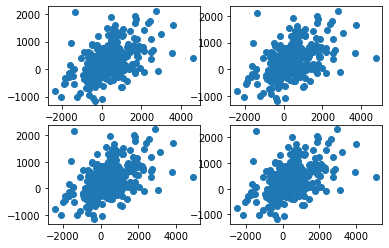

In [227]:
fig, aes = plt.subplots(nrows = 2, ncols = 2) 
for i in range(2):
    for j in range(2):
        n = i * 2 + j
        aes[i, j].scatter(ytest[:, n], yp[:, n])

In [228]:
def get_cor(x, y):
    o = []
    for i in range(x.shape[1]):
        o.append(np.corrcoef(x[:, i], y[:, i])[0, 1])
    return o  # np.corrcoef(x, y, rowvar = False)

In [229]:
np.corrcoef(ytest[:, 0], yp[:, 0])

array([[1.        , 0.47101665],
       [0.47101665, 1.        ]])

In [230]:
np.corrcoef(ytest[:, 0], yp[:, 0])

array([[1.        , 0.47101665],
       [0.47101665, 1.        ]])

In [231]:
get_cor(ytest, yp)

[0.47101665075325094,
 0.4700357685320413,
 0.46872004716538596,
 0.46898814674649725]

In [232]:
get_cor(ytest_pred_ls, ytest_ls)

[0.3565481705049927,
 0.35187762679436835,
 0.34738439541258337,
 0.34301031699881857]

In [233]:
get_cor(ytrain, yp_t)

[0.7291487767465833,
 0.7280996741765314,
 0.7261845439657059,
 0.7258281125779037]

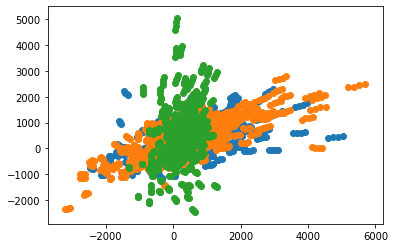

In [234]:
plt.scatter(ytest, yp)
plt.scatter(ytrain, yp_t)
plt.scatter(ytest_pred_ls, ytest_ls)

In [235]:
mse(yp, ytest)

818648.56

In [236]:
mse(yp_t, ytrain)

456116.62

In [237]:
mse(ytest_pred_ls, ytest_ls)

934360.44

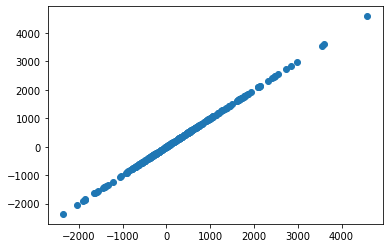

In [238]:
plt.scatter(ytest[:, 0], ytest_ls[:, 0])